# Core Banking View

Building Foundational Analytics and Summaries
We will learn how to create core banking views using Python and pandas.

This problem is important because banks need to aggregate data for regulatory reporting, customer insights, and risk management.

By working through business-driven examples, you will learn how to assemble transaction, customer, and account data into meaningful analytics.
We will build a simple but powerful foundation for real-world banking data analysis.

You will gain skill at using Python to create data aggregations, summaries, and tables essential for everyday banking operations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Example 1: Create synthetic banking transactions dataset
np.random.seed(42)
n_transactions = 1000
n_customers = 200
df = pd.DataFrame({
    'transaction_id': range(1, n_transactions + 1),
    'customer_id': np.random.choice([f'CUST_{i:04d}' for i in range(1, n_customers + 1)], n_transactions),
    'amount': np.round(np.random.normal(150, 60, n_transactions), 2),
    'transaction_type': np.random.choice(['Debit', 'Credit'], n_transactions),
    'channel': np.random.choice(['ATM', 'Online', 'Branch', 'POS'], n_transactions),
    'date': pd.date_range(start='2024-01-01', periods=n_transactions, freq='h')
})
print(df.shape)
print(df.head(3))

(1000, 6)
   transaction_id customer_id  amount transaction_type channel  \
0               1   CUST_0103  238.77           Credit     ATM   
1               2   CUST_0180  269.17           Credit     POS   
2               3   CUST_0093   58.62           Credit  Online   

                 date  
0 2024-01-01 00:00:00  
1 2024-01-01 01:00:00  
2 2024-01-01 02:00:00  


In [3]:
# Example 2: Create a simple customers table
customer_ids = [f'CUST_{i:04d}' for i in range(1, 201)]
customers = pd.DataFrame({
    'customer_id': customer_ids,
    'segment': ['Retail'] * 150 + ['Business'] * 50,
    'region': ['Metro'] * 100 + ['Regional'] * 100
})
print(customers.shape)
print(customers.head(3))

(200, 3)
  customer_id segment region
0   CUST_0001  Retail  Metro
1   CUST_0002  Retail  Metro
2   CUST_0003  Retail  Metro


In [4]:
# Example 3: Create a synthetic account types table
np.random.seed(42)
accounts = pd.DataFrame({
    'account_id': [f'ACC_{i:05d}' for i in range(1, 201)],
    'customer_id': customer_ids,
    'account_type': np.random.choice(['Savings', 'Cheque', 'Credit'], size=200),
    'open_date': pd.date_range(start='2015-01-01', periods=200, freq='30D')
})
print(accounts.shape)
print(accounts.head(3))

(200, 4)
  account_id customer_id account_type  open_date
0  ACC_00001   CUST_0001       Credit 2015-01-01
1  ACC_00002   CUST_0002      Savings 2015-01-31
2  ACC_00003   CUST_0003       Credit 2015-03-02


In [6]:
# most frequent channel
print(df['channel'].value_counts())

channel
ATM       266
POS       250
Branch    248
Online    236
Name: count, dtype: int64


In [7]:
# average transaction amount by type 'debit' or 'credit'
avg_amount_by_type = df.groupby('transaction_type')['amount'].mean()
print(avg_amount_by_type)


transaction_type
Credit    150.538052
Debit     152.880161
Name: amount, dtype: float64


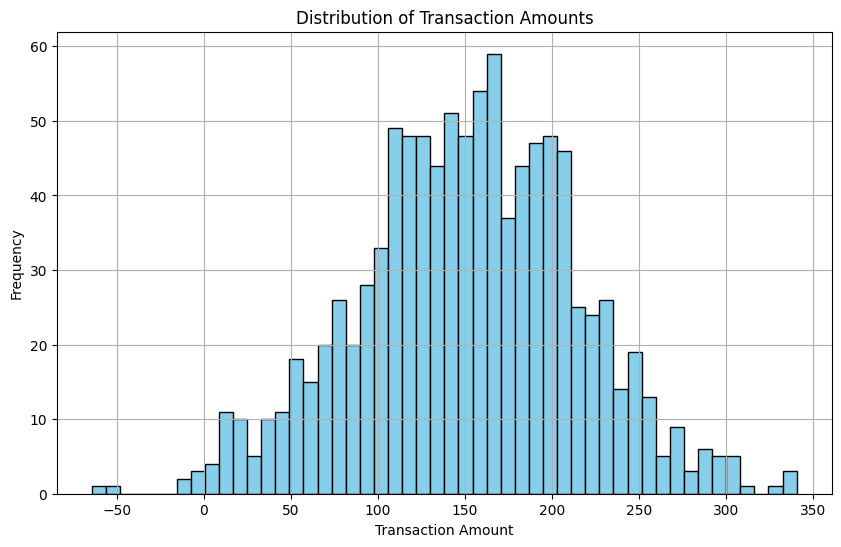

In [8]:
# hostogram of transaction amounts
plt.figure(figsize=(10, 6))
plt.hist(df['amount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [10]:
# total transaction amount by each day
df['date'] = pd.to_datetime(df['date'])
daily_total = df.groupby('date')['amount'].sum()
print(daily_total.head())

date
2024-01-01 00:00:00    238.77
2024-01-01 01:00:00    269.17
2024-01-01 02:00:00     58.62
2024-01-01 03:00:00     81.85
2024-01-01 04:00:00    163.56
Name: amount, dtype: float64


Text(0.5, 1.0, 'Daily Transaction Flow Over 2 Weeks')

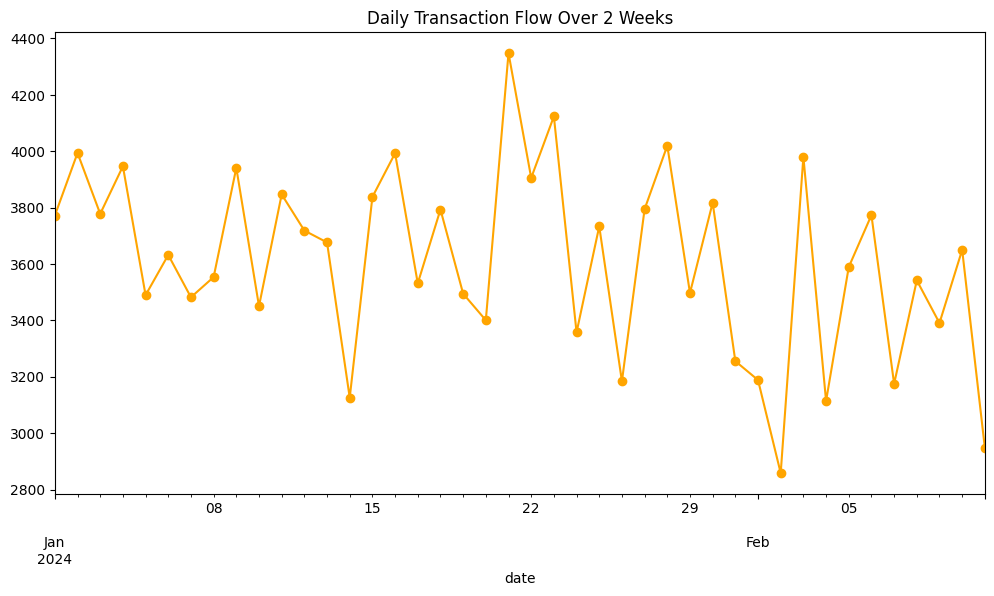

In [11]:
# calculate average daily flow and plot trends for 2 weeks  
df.set_index('date', inplace=True)
daily_flow = df['amount'].resample('D').sum()   
plt.figure(figsize=(12, 6))
daily_flow.plot(marker='o', color='orange')
plt.title('Daily Transaction Flow Over 2 Weeks')        

In [13]:
# Cross tabulation by channel and transaction type
cross_tab = pd.crosstab(df['channel'], df['transaction_type'])
print(cross_tab)


transaction_type  Credit  Debit
channel                        
ATM                  129    137
Branch               125    123
Online               113    123
POS                  136    114


In [14]:
# create cross-tabulation of channel vs segment
merged_df = pd.merge(df.reset_index(), customers, on='customer_id', how='left')
channel_segment_ct = pd.crosstab(merged_df['channel'], merged_df['segment'])    
print(channel_segment_ct)

segment  Business  Retail
channel                  
ATM            74     192
Branch         59     189
Online         57     179
POS            60     190


In [ ]:
# Joining transactions with customer segments 
merged = df.merge(customers, on='customer_id', how='left')
channel_by_seg = merged.groupby(['segment', 'channel']).size().unstack()
print(channel_by_seg)

channel   ATM  Branch  Online  POS
segment                           
Business   74      59      57   60
Retail    192     189     179  190


In [21]:
# Analyzing average transaction by region
avg_amount_by_region = merged.groupby('region')['amount'].mean()
print(avg_amount_by_region)

region
Metro       152.279400
Regional    151.162727
Name: amount, dtype: float64


In [ ]:
# filtering only 'Debit' transactions
debit_transactions = df[df['transaction_type'] == 'Debit']
print(debit_transactions.head())

                     transaction_id customer_id  amount transaction_type  \
date                                                                       
2024-01-01 03:00:00               4   CUST_0015   81.85            Debit   
2024-01-01 05:00:00               6   CUST_0072  200.38            Debit   
2024-01-01 07:00:00               8   CUST_0021   51.72            Debit   
2024-01-01 10:00:00              11   CUST_0075  137.63            Debit   
2024-01-01 11:00:00              12   CUST_0088   13.32            Debit   

                    channel  
date                         
2024-01-01 03:00:00  Branch  
2024-01-01 05:00:00  Online  
2024-01-01 07:00:00     POS  
2024-01-01 10:00:00  Branch  
2024-01-01 11:00:00  Online  


In [26]:
# Summing daily flows by region and type
pivot_table = merged.pivot_table(index='region', columns=['transaction_type'], values='amount', aggfunc='sum')
print(pivot_table.head())

transaction_type    Credit     Debit
region                              
Metro             36565.37  36985.58
Regional          39155.27  38995.86


In [ ]:
# Merging account by region
account_per_region = accounts.merge(customers, on='customer_id').groupby('region')['customer_id'].count()
print(account_per_region)

region
Metro       100
Regional    100
Name: customer_id, dtype: int64


In [30]:
# Identifying most active customers
activity_per_customer = df.groupby('customer_id').size()
top10_customers = activity_per_customer.sort_values(ascending=False).head(10)
print("Top 10 Most Active Customers:")
print(top10_customers)

Top 10 Most Active Customers:
customer_id
CUST_0190    13
CUST_0099    13
CUST_0113    11
CUST_0161    11
CUST_0147    10
CUST_0144    10
CUST_0145    10
CUST_0090    10
CUST_0028     9
CUST_0111     9
dtype: int64


# Handling Data Quality Issues in Banking Views

- Missing or duplicated IDs cause broken joins.
- Negative or zero amounts can signal data capture errors.
- Always check for unexpected nulls or out-of-bounds values after merging.
- Print samples early and often to catch mistakes before deeper analysis.

In [32]:
# Checking negative transaction amounts
negative_amounts = df[df['amount'] < 0].head()
print(negative_amounts)

                     transaction_id customer_id  amount transaction_type  \
date                                                                       
2024-01-04 22:00:00              95   CUST_0024   -4.38           Credit   
2024-01-07 21:00:00             166   CUST_0170  -64.09           Credit   
2024-01-10 15:00:00             232   CUST_0068   -4.69           Credit   
2024-01-13 09:00:00             298   CUST_0161  -12.75           Credit   
2024-01-13 16:00:00             305   CUST_0166   -1.76            Debit   

                    channel  
date                         
2024-01-04 22:00:00  Online  
2024-01-07 21:00:00  Online  
2024-01-10 15:00:00     ATM  
2024-01-13 09:00:00     ATM  
2024-01-13 16:00:00  Branch  


In [34]:
#  Check customer IDs is null in merged dataframe   
print(merged[merged['customer_id'].isnull()])


Empty DataFrame
Columns: [transaction_id, customer_id, amount, transaction_type, channel, segment, region]
Index: []


# Best Practices in Building Bank Data Views

- Always start by profiling data for nulls and range errors.
- Use explicit joins and always check output shapes.
- Verify all ID relationships before business analysis.
- Use meaningful column names so business partners understand your work.
- Save clean, intermediate tables as checkpoints.

In [37]:
# End-to-end Example: Calculate total monthly debit value by customer segment
df.reset_index(inplace=True)
df['month'] = df['date'].dt.to_period('M')
enriched = df.merge(customers, on='customer_id', how='left')    
monthly_debit = enriched[enriched['transaction_type'] == 'Debit'].groupby(['month', 'segment'])['amount'].sum().unstack()
print(monthly_debit.head())

segment  Business    Retail
month                      
2024-01  15220.63  40703.22
2024-02   4019.28  16038.31


In [38]:
# Final Practice: Calculate share of business customers by region with at least one credit transaction
business_credits = merged[(merged['segment'] == 'Business') & (merged['transaction_type'] == 'Credit')]
business_region_counts = business_credits.groupby('region')['customer_id'].nunique()
all_business_counts = customers[customers['segment'] == 'Business'].groupby('region')['customer_id'].nunique()
share = (business_region_counts / all_business_counts * 100).round(2)
print(share)

region
Regional    90.0
Name: customer_id, dtype: float64
